In [7]:
import pandas as pd

# Cargar los datos desde el archivo CSV
file_path = r'C:\Users\USUARIO\Documents\trabajos_realizados\Maria_Celeste\tarea4\Mall_Customers.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Escalamos los datos
scaler = StandardScaler()
df_scaled = df[numeric_columns].copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Verificar cómo quedan los datos escalados
df_scaled.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


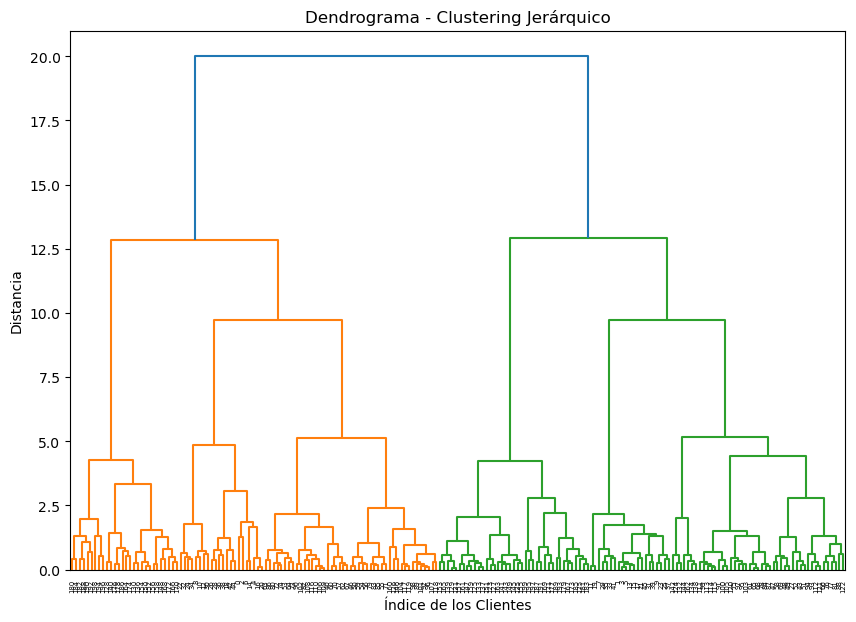

In [17]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Calcular la matriz de distancias y crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

# Mostrar el gráfico
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Índice de los Clientes")
plt.ylabel("Distancia")
plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Crear el modelo de aglomeración jerárquica con 2 clusters
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Ajustar el modelo a los datos escalados
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Agregar las etiquetas de los clusters al dataframe original
df['Cluster'] = hierarchical_labels

# Mostrar los primeros registros con las etiquetas de cluster
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        0  
2        1  
3        0  
4        1  


In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette
silhouette_avg = silhouette_score(df_scaled, hierarchical_labels)
print("Silhouette Coefficient: ", silhouette_avg)

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, hierarchical_labels)
print("Calinski-Harabasz Index: ", calinski_harabasz_avg)


Silhouette Coefficient:  0.31795733680759597
Calinski-Harabasz Index:  99.00066801676013


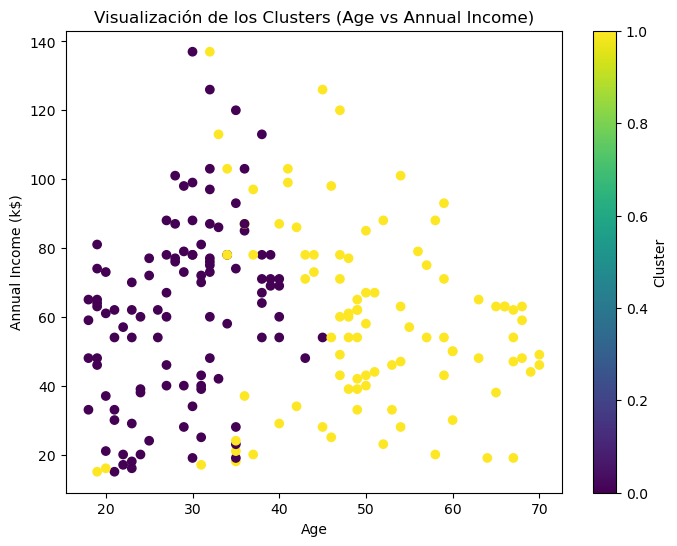

In [25]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión 2D de los clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')

# Colocar las etiquetas de los ejes
plt.title('Visualización de los Clusters (Age vs Annual Income)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Mostrar la leyenda
plt.colorbar(label='Cluster')

# Mostrar el gráfico
plt.show()
